In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

vm=pd.read_csv(r"C:\Users\SARTHAK JAGADALE\OneDrive\Desktop\pandas\data.csv")
vm.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443


In [27]:
vm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    float64
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [25]:
vm.horsepower.unique()

array([130.        , 165.        , 150.        , 140.        ,
       198.        , 220.        , 215.        , 225.        ,
       190.        , 170.        , 160.        ,  95.        ,
        97.        ,  85.        ,  88.        ,  46.        ,
        87.        ,  90.        , 113.        , 200.        ,
       210.        , 193.        , 104.46938776, 100.        ,
       105.        , 175.        , 153.        , 180.        ,
       110.        ,  72.        ,  86.        ,  70.        ,
        76.        ,  65.        ,  69.        ,  60.        ,
        80.        ,  54.        , 208.        , 155.        ,
       112.        ,  92.        , 145.        , 137.        ,
       158.        , 167.        ,  94.        , 107.        ,
       230.        ,  49.        ,  75.        ,  91.        ,
       122.        ,  67.        ,  83.        ,  78.        ,
        52.        ,  61.        ,  93.        , 148.        ,
       129.        ,  96.        ,  71.        ,  98.  

In [13]:
vm.horsepower.replace({'?':np.nan},inplace=True)

In [17]:
vm['horsepower'] = vm['horsepower'].astype(float)

In [19]:
vm.horsepower.fillna(vm.horsepower.mean(),inplace=True)

C:\Users\SARTHAK JAGADALE\AppData\Local\Temp\ipykernel_13212\3886691911.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  vm.horsepower.fillna(vm.horsepower.mean(),inplace=True)


In [23]:
vm.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130.0,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165.0,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150.0,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150.0,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140.0,3449,10.5,1970,ford torino,7.227443


In [31]:
vm=vm.drop(['name'],axis=1)

In [39]:
vm.cylinders.describe()

count    398.000000
mean       5.454774
std        1.701004
min        3.000000
25%        4.000000
50%        4.000000
75%        8.000000
max        8.000000
Name: cylinders, dtype: float64

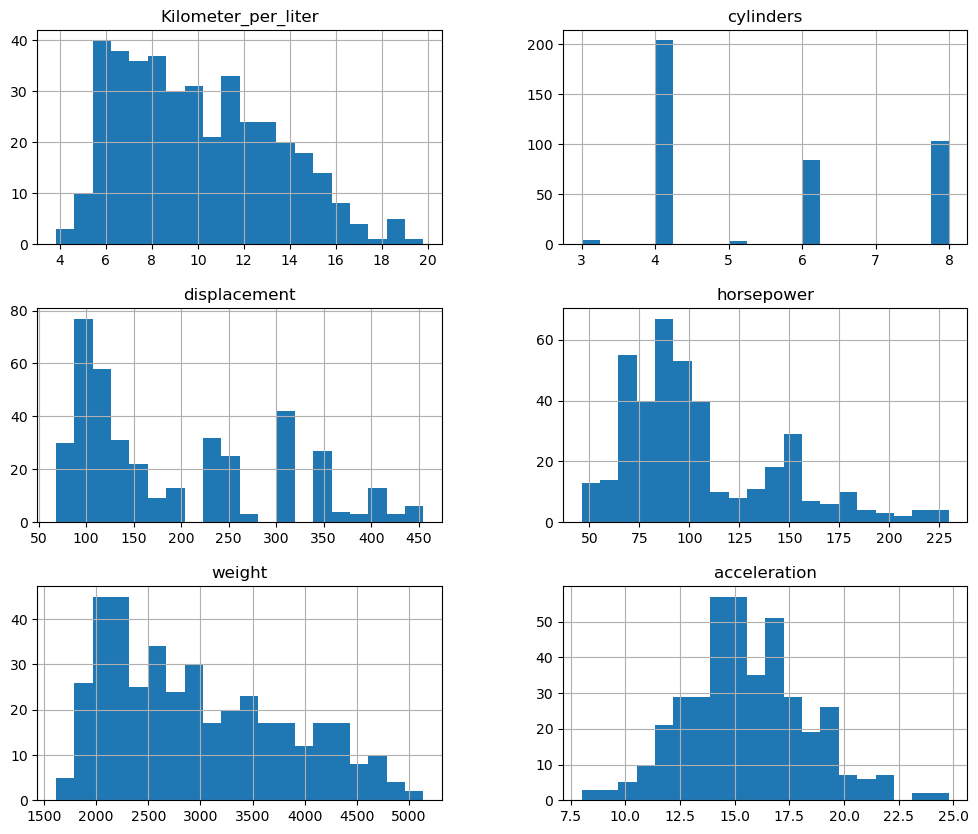

In [35]:
vm[['Kilometer_per_liter', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']].hist(bins=20, figsize=(12, 10))
plt.show()

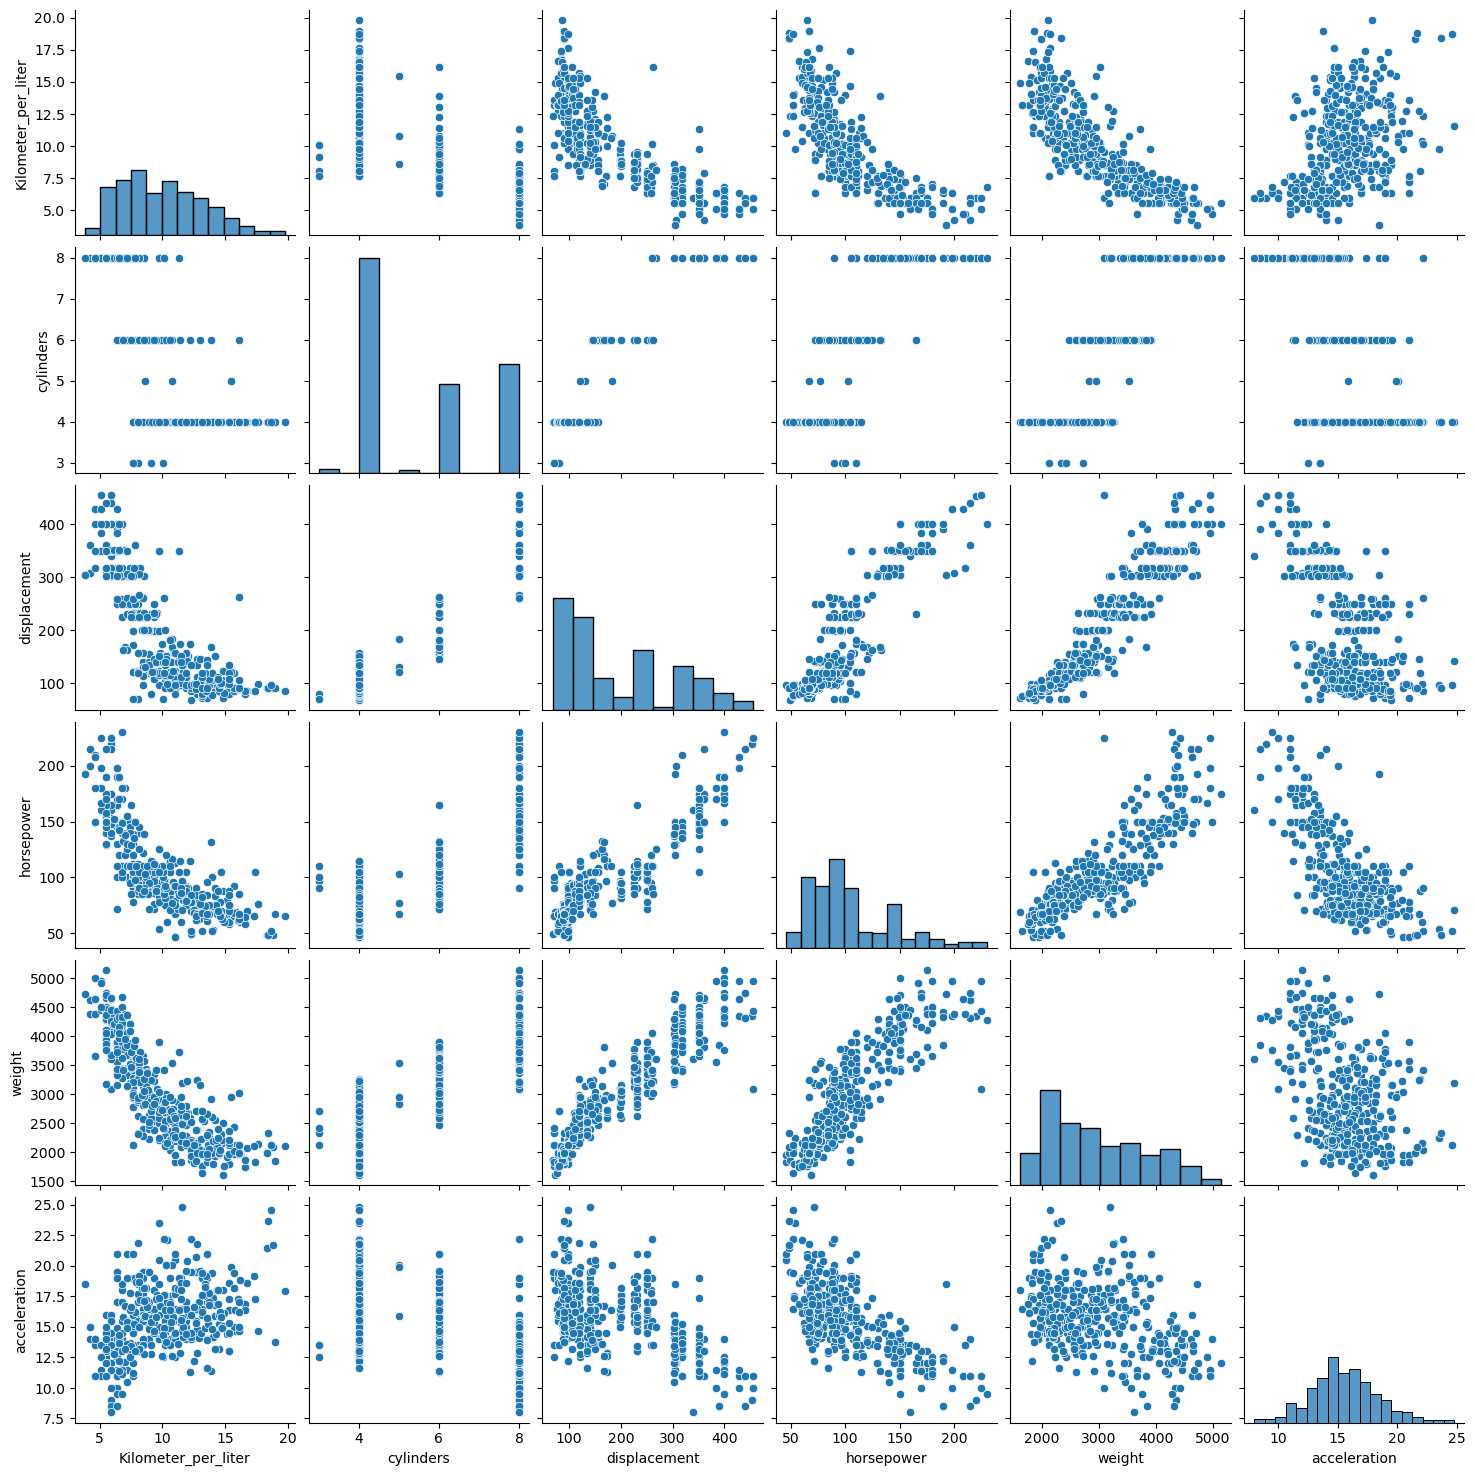

In [37]:
sns.pairplot(vm[['Kilometer_per_liter', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']])
plt.show()

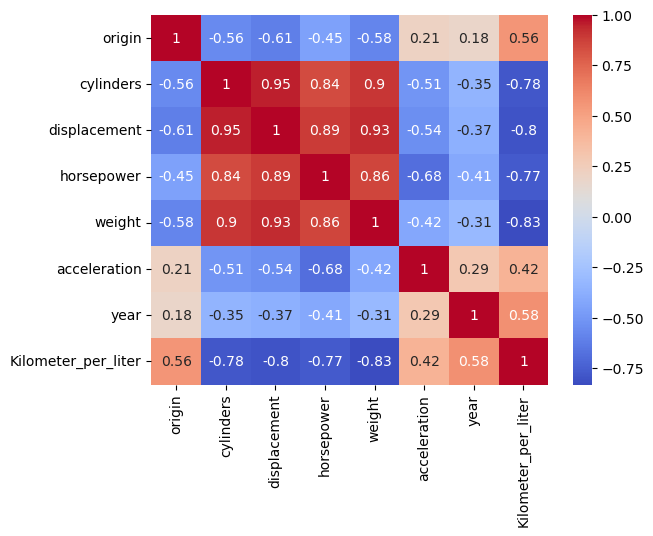

In [45]:
correlation_matrix = vm.corr().round(2)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [47]:
train_vm,test_vm=train_test_split(vm,test_size=.2)

In [51]:
train_vm_x= train_vm.iloc[: ,0:-1] # select all x variables
train_vm_y= train_vm.iloc[: ,-1] #select all y variables

test_vm_x= test_vm.iloc[: ,0:-1] # select all x variable
test_vm_y= test_vm.iloc[: ,-1] #select all x variable

In [53]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_vm_x)
X_test_scaled = scaler.transform(test_vm_x)

In [55]:
# Initialize the SGD Regressor
sgd_regressor = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)

# Train the model
sgd_regressor.fit(X_train_scaled, train_vm_y)

# Predict on the test set
y_pred = sgd_regressor.predict(X_test_scaled)

# Model Evaluation
mse = mean_squared_error(test_vm_y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(test_vm_y, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R2 Score: {r2}')


Mean Squared Error (MSE): 1.7588079577350022
Root Mean Squared Error (RMSE): 1.3262005722118364
R2 Score: 0.7905145030710168


In [57]:
# Cross-validation to check the performance
cv_scores = cross_val_score(sgd_regressor, X_train_scaled, train_vm_y, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-validated MSE: {-cv_scores.mean()}')


Cross-validated MSE: 2.255324117555223


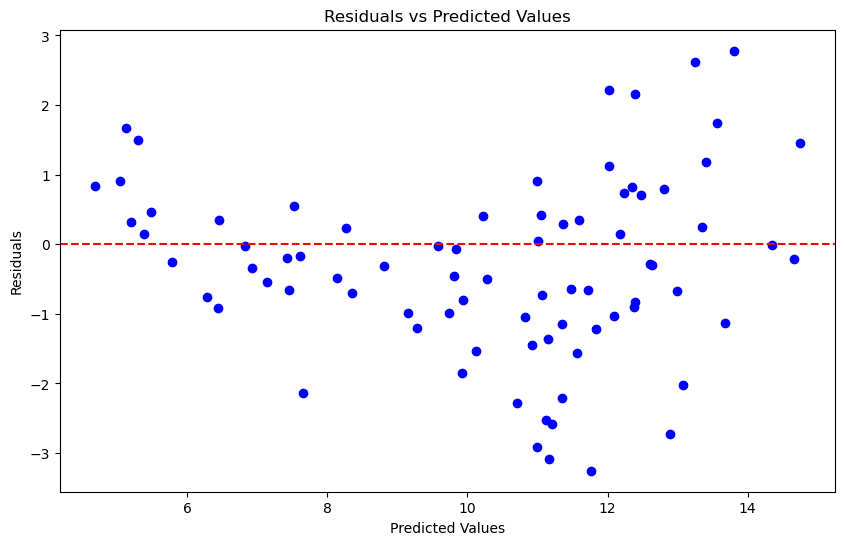

In [63]:
# Residuals (actual vs predicted)
residuals = test_vm_y - y_pred

# Plot residuals
plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuals, color='blue')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()
